In [262]:
# std
import os
from os import path
import time

# 3p
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# prj
os.chdir("..")
from src import helpers, configuration, filtering, bandpower, metrics, plots, statistics as stats
from src.configuration import cfg, cfg_mr
os.chdir('analysis-adelie')

# ttest
from scipy.stats import ttest_ind

# plots
import matplotlib

font = {'family':'DejaVu Sans', 'weight':'normal', 'size':20}
matplotlib.rc('font', **font)

%matplotlib qt

In [111]:
from importlib import reload
reload(metrics)

<module 'src.metrics' from 'C:\\Users\\adeli\\OneDrive\\Documents\\GitHub\\eeg-meditation\\src\\metrics.py'>

In [3]:
# defining frequency bands
cfg['bands'] = {'gamma': [40, 100], 'beta': [12, 40], 'alpha': [8, 12], 'theta': [4, 8], 'delta': [1, 4]}

# updating: dividing alpha band in four sub-bands
# cfg['bands'] = {"alpha1": [8, 9], "alpha2":[9, 10],"alpha3":[10, 11], "alpha4":[11, 12]}

# defining ratios
ratioList = ['gamma / beta', 'gamma / alpha', 'gamma / theta', 'gamma / delta', 'beta / alpha', 'beta / theta', 'beta / delta', 'alpha / theta', 'alpha / delta', 'theta / delta']

Bandpowers

In [4]:
# Adélie's data
baseline_bandpowers_adelie = helpers.load_bandpower_all_epochs_all_recordings_df('baseline', subject='adelie')
meditation_bandpowers_adelie = helpers.load_bandpower_all_epochs_all_recordings_df('meditation', subject='adelie')

merged_bandpower_adelie = pd.concat([baseline_bandpowers_adelie, meditation_bandpowers_adelie], keys=["baseline", "meditation"])

In [5]:
# Sam's data
baseline_bandpowers_sam = helpers.load_bandpower_all_epochs_all_recordings_df('baseline', subject='sam')
meditation_bandpowers_sam = helpers.load_bandpower_all_epochs_all_recordings_df('meditation', subject='sam')

merged_bandpower_sam = pd.concat([baseline_bandpowers_sam, meditation_bandpowers_sam], keys=["baseline", "meditation"])

In [6]:
# Sam2's data
baseline_bandpowers_sam2 = helpers.load_bandpower_all_epochs_all_recordings_df('baseline', subject='sam2')
meditation_bandpowers_sam2 = helpers.load_bandpower_all_epochs_all_recordings_df('meditation', subject='sam2')

merged_bandpower_sam2 = pd.concat([baseline_bandpowers_sam2, meditation_bandpowers_sam2], keys=["baseline", "meditation"])

In [7]:
# Sam3's data
baseline_bandpowers_sam3 = helpers.load_bandpower_all_epochs_all_recordings_df('baseline', subject='sam3')
meditation_bandpowers_sam3 = helpers.load_bandpower_all_epochs_all_recordings_df('meditation', subject='sam3')

merged_bandpower_sam3 = pd.concat([baseline_bandpowers_sam3, meditation_bandpowers_sam3], keys=["baseline", "meditation"])

In [8]:
# Sam4's data
baseline_bandpowers_sam4 = helpers.load_bandpower_all_epochs_all_recordings_df('baseline', subject='sam4')
meditation_bandpowers_sam4 = helpers.load_bandpower_all_epochs_all_recordings_df('meditation', subject='sam4')

merged_bandpower_sam4 = pd.concat([baseline_bandpowers_sam4, meditation_bandpowers_sam4], keys=["baseline", "meditation"])

In [9]:
# Raphaël's data
baseline_bandpowers_rap = helpers.load_bandpower_all_epochs_all_recordings_df('baseline', subject='raphael')
meditation_bandpowers_rap = helpers.load_bandpower_all_epochs_all_recordings_df('meditation', subject='raphael')

merged_bandpower_rap = pd.concat([baseline_bandpowers_rap, meditation_bandpowers_rap], keys=["baseline", "meditation"])

In [10]:
# Raphaël2's data
baseline_bandpowers_rap2 = helpers.load_bandpower_all_epochs_all_recordings_df('baseline', subject='raphael2')
meditation_bandpowers_rap2 = helpers.load_bandpower_all_epochs_all_recordings_df('meditation', subject='raphael2')

merged_bandpower_rap2 = pd.concat([baseline_bandpowers_rap2, meditation_bandpowers_rap2], keys=["baseline", "meditation"])

In [11]:
# Raphaël3's data
baseline_bandpowers_rap3 = helpers.load_bandpower_all_epochs_all_recordings_df('baseline', subject='raphael3')
meditation_bandpowers_rap3 = helpers.load_bandpower_all_epochs_all_recordings_df('meditation', subject='raphael3')

merged_bandpower_rap3 = pd.concat([baseline_bandpowers_rap3, meditation_bandpowers_rap3], keys=["baseline", "meditation"])

In [12]:
# Arnaud's data
baseline_bandpowers_arn = helpers.load_bandpower_all_epochs_all_recordings_df('baseline', subject='arnaud')
meditation_bandpowers_arn = helpers.load_bandpower_all_epochs_all_recordings_df('meditation', subject='arnaud')

merged_bandpower_arn = pd.concat([baseline_bandpowers_arn, meditation_bandpowers_arn], keys=["baseline", "meditation"])

## 1. Alpha maximum power frequency peak

### Former work: spectral power analysis of four Alpha sub-bands (barplots and ttests)

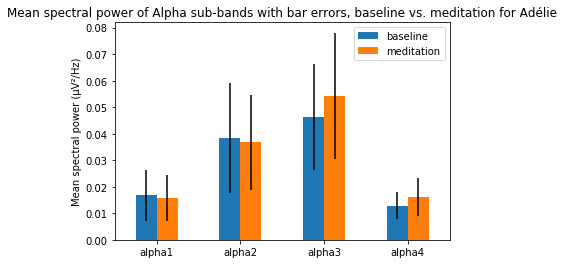

In [5]:
# bandpowers Alpha Adélie
plots.plot_bandpower_bar_std_concurrent(merged_bandpower_adelie, bands_to_plot=['alpha1', 'alpha2', 'alpha3', 'alpha4'],
                                        title="Mean spectral power of Alpha sub-bands with bar errors, baseline vs. meditation for Adélie")

In [9]:
# Adélie ttest
from scipy.stats import ttest_ind
merged_adelie_aligned['AVG'] = merged_adelie_aligned.mean(axis=1)

ttest_adelie_alpha_subbands = merged_adelie_aligned.swaplevel(0,1) \
.groupby(level=0).agg(
    lambda x: ttest_ind(x.xs('baseline', level=1), x.xs('meditation', level=1), equal_var=False, nan_policy='omit'))

In [10]:
# FWER corrected ttest: ttest over 4 alpha subbands
FWER_threshold = 0.05 / 4
print("The FWER threshold is", FWER_threshold)

p_values_adelie_alpha_subbands = ttest_adelie_alpha_subbands.applymap(lambda x: x[1])['AVG']

# download to CSV only significant pvalues
p_values_adelie_alpha_subbands[p_values_adelie_alpha_subbands < FWER_threshold].to_csv('p_values_adelie_alpha_subbands.csv')
print("The significant pvalues are \n", p_values_adelie_alpha_subbands[p_values_adelie_alpha_subbands < FWER_threshold])

The FWER threshold is 0.0125
The significant pvalues are 
 alpha2 / alpha3    0.010493
alpha4             0.011524
Name: AVG, dtype: float64


C:\Users\adeli\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  


In [11]:
ttest_adelie_alpha_subbands

,P3,C3,F3,Fz,F4,C4,P4,Cz,Pz,Fp1,...,T3,T5,O1,O2,F7,F8,A2,T6,T4,AVG
alpha1,"(1.6690628131640746, 0.10454586164255329)","(-1.1295486553866838, 0.2658491081726583)","(-0.5146422833831102, 0.6090825800223711)","(0.6459470429452461, 0.5217978946209038)","(-1.271179682946032, 0.21046008755830334)","(-0.11562762295158628, 0.9086562878588069)","(0.8984052990632991, 0.37525377081819633)","(0.01540704914895522, 0.9877931633891334)","(0.0896529223521936, 0.9291021406253765)","(0.9397058465506957, 0.35416582756609116)",...,"(1.0118389310465985, 0.3198170329502893)","(2.0559691565473854, 0.047986912398536384)","(1.2442445850851256, 0.2215662416505738)","(-0.18772480667482558, 0.8518293902443907)","(-1.1390575658469466, 0.26011628886789345)","(-1.2982950070322685, 0.19955998006212958)","(-1.0319944624674797, 0.3064938628449883)","(-1.1403804743912773, 0.259428255649295)","(-0.5352519051990208, 0.5959388710355864)","(0.46479220953979944, 0.6447446446767968)"
alpha1 / alpha2,"(1.0076243818779607, 0.3195715575631167)","(0.7740653908414626, 0.4448898834050271)","(0.3115403465011802, 0.7573155870946929)","(0.013635388308081657, 0.989191721368373)","(0.34730527060218686, 0.7305517470249558)","(0.9718502339408264, 0.33866815042429343)","(1.3758449304428744, 0.17883656847797388)","(-0.2472928019857696, 0.8059021420817234)","(0.22117610804317145, 0.8257823883739543)","(0.8358147706879441, 0.40957289144351505)",...,"(1.6260339733495117, 0.1151338327146036)","(1.4931906340272263, 0.14350654998220233)","(0.91886788431513, 0.36427560469854925)","(-2.168011359602541, 0.033737844108823814)","(0.6380990208697428, 0.5277885509220539)","(0.38313055032410925, 0.7040643338725072)","(1.6032566544559537, 0.11734101083562781)","(0.22293456604060813, 0.8245524690106574)","(0.9646216282874156, 0.3428953345963036)","(0.9164773193472208, 0.36616245877792897)"
alpha1 / alpha3,"(1.3979663617679816, 0.1726481059728387)","(1.6955887807259795, 0.09993061203027721)","(1.292815181265594, 0.20425566027436248)","(0.8889867690827173, 0.3766947003194917)","(1.0508922013256448, 0.297689272190287)","(2.1859104726943883, 0.03735246792008908)","(1.583029645192156, 0.12413753752570532)","(0.8379870394577679, 0.40716960497362253)","(1.7993118578616814, 0.08262082337155827)","(1.8271737347234123, 0.07531327135898037)",...,"(2.2815680460843, 0.03043861291787562)","(1.9528518609114192, 0.05964710774359488)","(1.2900600077191207, 0.20578127617657804)","(0.8450867283142631, 0.40261059077564443)","(1.7572922878254926, 0.08401912372081588)","(1.5242459308291654, 0.13829431330730263)","(1.649407806045155, 0.10945366969578842)","(0.897183312534646, 0.3729753612603436)","(1.7738623336834538, 0.08641070140555594)","(2.4276713888233075, 0.02091218640072627)"
alpha1 / alpha4,"(1.5303595814416961, 0.1360473396683543)","(1.5605145440772212, 0.12740164751531247)","(1.629763352393548, 0.11234679045368487)","(1.7169811215346338, 0.09458238566997994)","(1.2346735586345317, 0.22437586935491532)","(2.026130442844487, 0.05256528230950524)","(1.4072492758998976, 0.16851522077791867)","(1.497084604624969, 0.14457255702560415)","(1.9277060766511491, 0.06101242903620792)","(2.279459812968544, 0.027618887051814565)",...,"(2.0971822269034237, 0.045069311196066095)","(1.9875938243887759, 0.05673031863720841)","(1.7284736833076957, 0.09445585687509908)","(0.6191165068606423, 0.5392699552343613)","(1.1871667936575938, 0.24219335440995748)","(1.5439644289231909, 0.13247705988995392)","(2.047726724865783, 0.04998186330725061)","(0.13841032008526666, 0.8903976287373329)","(1.6164445303481063, 0.11676288159027821)","(2.564577376948769, 0.015107754601608627)"
alpha2,"(1.3621954039364994, 0.1824274609191534)","(-1.704421686994904, 0.0958266140779921)","(0.11936030431548633, 0.9055074943124126)","(0.8706566845515037, 0.3890096697518287)","(-1.0245286162166622, 0.310762197543236)","(-0.620175247356494, 0.5387276987415557)","(0.38134890517226916, 0.7051234452901656)","(0.6403154331974688, 0.5260111307301507)","(-0.05402159

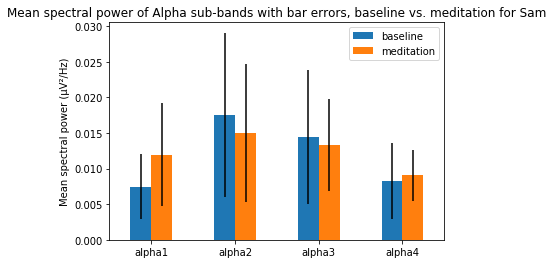

In [12]:
# bandpowers Alpha Sam
plots.plot_bandpower_bar_std_concurrent(merged_bandpower_sam, bands_to_plot=['alpha1', 'alpha2', 'alpha3', 'alpha4'],
                                        title="Mean spectral power of Alpha sub-bands with bar errors, baseline vs. meditation for Sam")

In [13]:
# Sam ttest
from scipy.stats import ttest_ind
merged_sam_aligned['AVG'] = merged_sam_aligned.mean(axis=1)

ttest_sam_alpha_subbands = merged_sam_aligned.swaplevel(0,1) \
.groupby(level=0).agg(
    lambda x: ttest_ind(x.xs('baseline', level=1), x.xs('meditation', level=1), equal_var=False, nan_policy='omit'))

In [14]:
ttest_sam_alpha_subbands

,P3,C3,F3,Fz,F4,C4,P4,Cz,Pz,Fp1,...,T3,T5,O1,O2,F7,F8,A2,T6,T4,AVG
alpha1,"(-5.047346920079149, 1.6866291730201078e-06)","(-6.033342729127865, 1.8489107794098634e-08)","(-3.5239036708293225, 0.0007186626979420066)","(-4.969385544058614, 2.3267532214965116e-06)","(-7.255716262304915, 4.697684213610276e-11)","(-2.593853360804471, 0.01087411951579569)","(-3.624574300979938, 0.00043229353671673214)","(-3.0635965626266217, 0.0027825196122504546)","(-2.2154493723068116, 0.03011807805729199)","(1.6222789901443257, 0.109261171799283)",...,"(-3.081934279710857, 0.002851348797264209)","(-0.8475229400224916, 0.4012567196552733)","(-0.7520226528317016, 0.4553957740141231)","(0.3138267457111125, 0.7548021635868942)","(-2.120494482160421, 0.03611642191173921)","(1.9184227229106137, 0.061392708776393155)","(-1.3528915533752268, 0.18027480609139987)","(-6.293633590914553, 6.762762679901912e-09)","(0.7117646257281267, 0.4797180252557519)","(-4.097274647248856, 8.85591978531406e-05)"
alpha1 / alpha2,"(-4.595081188060894, 1.1229813449456125e-05)","(-4.477346137252031, 1.8122512731989347e-05)","(-4.615242933063637, 1.0010921796373154e-05)","(-5.04687616453394, 1.6622358105010948e-06)","(-5.302748700775342, 5.543970232868179e-07)","(-4.586751059764501, 1.1199578342991162e-05)","(-5.537714111603482, 1.837450506017463e-07)","(-4.75523196618965, 5.57835023734773e-06)","(-5.156628139602456, 1.0265948917316267e-06)","(-4.436434819034109, 2.0459670569671485e-05)",...,"(-4.891272633395965, 3.6257796823410136e-06)","(-0.9553338394050868, 0.3435772378004933)","(-2.516026095479708, 0.014044138289732779)","(-1.5890366529740636, 0.11542103812557852)","(-4.128712244416523, 6.792437889739215e-05)","(-4.421562961380831, 2.1712171292750893e-05)","(-3.0394916148203417, 0.0030790795700793984)","(-2.355489304695839, 0.02118143437577922)","(-4.362387542318601, 2.87737719758028e-05)","(-5.271309952178087, 6.153384813024881e-07)"
alpha1 / alpha3,"(-4.653201061100977, 8.796742325281057e-06)","(-2.2893246701716667, 0.024261792454660987)","(-2.955574245580037, 0.003757897388029735)","(-4.106875239842128, 7.650638471575952e-05)","(-4.118744297397756, 7.18789139589121e-05)","(-4.597062869884029, 1.089881438395823e-05)","(-5.371012806070437, 4.36148401449648e-07)","(-4.290220819202629, 3.6339655735869946e-05)","(-5.480355425990357, 2.7739279145265984e-07)","(-3.0040410960330544, 0.0032891094663199507)",...,"(-3.2915198597721336, 0.0013716173624838102)","(-2.775912666858179, 0.006419273261960225)","(-3.6594594441916257, 0.0003781253770515337)","(-2.058923546211394, 0.042355021459749634)","(-3.3979431241146365, 0.0009224236348288352)","(-2.783374500203912, 0.006261069092039539)","(-2.9870481999881764, 0.0034951585396396975)","(-3.9139755875263873, 0.0001533029098325778)","(-1.9830317423633177, 0.04996799553674107)","(-4.4730618197386605, 1.7763448812134717e-05)"
alpha1 / alpha4,"(-3.275050182117316, 0.0013916628635888956)","(-1.00560065242519, 0.31726207098958265)","(-2.0071844689307907, 0.04713840377955013)","(-3.658017504342561, 0.00038256569446161584)","(-4.147366440105015, 6.463492605264717e-05)","(-2.474563384571359, 0.014777110442732748)","(-4.3850430675079535, 2.5289198251516814e-05)","(-2.5279218446100984, 0.013013518774819417)","(-3.596316497736013, 0.0004901047053289869)","(-2.1974322223685676, 0.030063680702672468)",...,"(-1.5882776371563987, 0.11591496486362121)","(-1.8112384989717387, 0.07379325658659824)","(-1.972404104842394, 0.0524033381163704)","(-0.6008830347915096, 0.549822712523709)","(-2.1234178059984727, 0.03607474747626789)","(-2.123305407631963, 0.035932684927858755)","(-2.5682171649753704, 0.011653486128728796)","(-4.968382041152721, 2.6110264743412422e-06)","(0.8011296210084398, 0.42631483343490084)","(-3.431484669741307, 0.0008311691856568108)"
alpha2,"(-0.36506630704673837, 0.7164271604087785)","(-2.789299936943443, 0.006532008671970723)","(-0.07808138836472518, 0.937998295494927)","(0.5929614368891846, 0.5557547546661861)","(-3.380046200160503, 0.0

In [15]:
# FWER corrected ttest: ttest over 4 alpha subbands
FWER_threshold = 0.05 / 4
print("The FWER threshold is", FWER_threshold)

p_values_sam_alpha_subbands = ttest_sam_alpha_subbands.applymap(lambda x: x[1])['AVG']

# download to CSV only significant pvalues
p_values_sam_alpha_subbands[p_values_sam_alpha_subbands < FWER_threshold].to_csv('p_values_sam_alpha_subbands.csv')
print("The significant pvalues are \n", p_values_sam_alpha_subbands[p_values_sam_alpha_subbands < FWER_threshold])

The FWER threshold is 0.0125
The significant pvalues are 
 alpha1             8.855920e-05
alpha1 / alpha2    6.153385e-07
alpha1 / alpha3    1.776345e-05
alpha1 / alpha4    8.311692e-04
Name: AVG, dtype: float64


C:\Users\adeli\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  


### Max Welch power freq peak of Alpha band (boxplots)

In [255]:
# MR data welch
signal_mr_b = helpers.load_signal_data("baseline", config=cfg_mr, subject='mr')
signal_mr_m = helpers.load_signal_data("meditation", config=cfg_mr, subject='mr')

baseline_psd_mr = stats.get_dsp_welch(signal_mr_b, welch_window_sec=4)
meditation_psd_mr = stats.get_dsp_welch(signal_mr_m, welch_window_sec=4)

In [244]:
# Adélie data welch
baseline_psd_adelie = stats.get_dsp_welch(helpers.load_signal_data("baseline", config=cfg, subject='adelie'), welch_window_sec=4)
meditation_psd_adelie = stats.get_dsp_welch(helpers.load_signal_data("meditation", config=cfg, subject='adelie'), welch_window_sec=4)

In [14]:
# Sam data welch
baseline_psd_sam = stats.get_dsp_welch(helpers.load_signal_data("baseline", config=cfg, subject='sam'), welch_window_sec=4)
meditation_psd_sam = stats.get_dsp_welch(helpers.load_signal_data("meditation", config=cfg, subject='sam'), welch_window_sec=4)

# Sam2 data welch
baseline_psd_sam2 = stats.get_dsp_welch(helpers.load_signal_data("baseline", config=cfg, subject='sam2'), welch_window_sec=4)
meditation_psd_sam2 = stats.get_dsp_welch(helpers.load_signal_data("meditation", config=cfg, subject='sam2'), welch_window_sec=4)

# Sam3 data welch
baseline_psd_sam3 = stats.get_dsp_welch(helpers.load_signal_data("baseline", config=cfg, subject='sam3'), welch_window_sec=4)
meditation_psd_sam3 = stats.get_dsp_welch(helpers.load_signal_data("meditation", config=cfg, subject='sam3'), welch_window_sec=4)

# Sam4 data welch
baseline_psd_sam4 = stats.get_dsp_welch(helpers.load_signal_data("baseline", config=cfg, subject='sam4'), welch_window_sec=4)
meditation_psd_sam4 = stats.get_dsp_welch(helpers.load_signal_data("meditation", config=cfg, subject='sam4'), welch_window_sec=4)

In [15]:
# Raphaël data welch
baseline_psd_rap = stats.get_dsp_welch(helpers.load_signal_data("baseline", config=cfg, subject='raphael'), welch_window_sec=4)
meditation_psd_rap = stats.get_dsp_welch(helpers.load_signal_data("meditation", config=cfg, subject='raphael'), welch_window_sec=4)

# Raphaël2 data welch
baseline_psd_rap2 = stats.get_dsp_welch(helpers.load_signal_data("baseline", config=cfg, subject='raphael2'), welch_window_sec=4)
meditation_psd_rap2 = stats.get_dsp_welch(helpers.load_signal_data("meditation", config=cfg, subject='raphael2'), welch_window_sec=4)

# Raphaël3 data welch
baseline_psd_rap3 = stats.get_dsp_welch(helpers.load_signal_data("baseline", config=cfg, subject='raphael3'), welch_window_sec=4)
meditation_psd_rap3 = stats.get_dsp_welch(helpers.load_signal_data("meditation", config=cfg, subject='raphael3'), welch_window_sec=4)

In [16]:
# Arnaud data welch
baseline_psd_arn = stats.get_dsp_welch(helpers.load_signal_data("baseline", config=cfg, subject='arnaud'), welch_window_sec=4)
meditation_psd_arn = stats.get_dsp_welch(helpers.load_signal_data("meditation", config=cfg, subject='arnaud'), welch_window_sec=4)

Adélie

In [136]:
alpha_freq_ad = metrics.get_mean_svd_band(baseline_psd_adelie, meditation_psd_adelie, cfg['bands']['alpha'])

In [134]:
alpha_freq_plot_ad = metrics.get_boxplot_band(baseline_psd_adelie, meditation_psd_adelie, cfg['bands']['alpha'], "Frequency of maximum power in Alpha band \n for Adélie")

Sam

In [78]:
alpha_freq_sam = metrics.get_mean_svd_band(baseline_psd_sam, meditation_psd_sam, cfg['bands']['alpha'])

In [133]:
alpha_freq_plot_sam = metrics.get_boxplot_band(baseline_psd_sam, meditation_psd_sam, cfg['bands']['alpha'], "Frequency of maximum power in Alpha band \n for Sam")

In [137]:
alpha_freq_sam2 = metrics.get_mean_svd_band(baseline_psd_sam2, meditation_psd_sam2, cfg['bands']['alpha'])

In [130]:
alpha_freq_plot_sam2 = metrics.get_boxplot_band(baseline_psd_sam2, meditation_psd_sam2, cfg['bands']['alpha'], "Frequency of maximum power in Alpha band \n for Sam2")

In [27]:
alpha_freq_sam3 = metrics.get_mean_svd_band(baseline_psd_sam3, meditation_psd_sam3, cfg['bands']['alpha'])

In [131]:
alpha_freq_plot_sam3 = metrics.get_boxplot_band(baseline_psd_sam3, meditation_psd_sam3, cfg['bands']['alpha'], "Frequency of maximum power in Alpha band \n for Sam3")

In [58]:
alpha_freq_sam4 = metrics.get_mean_svd_band(baseline_psd_sam4, meditation_psd_sam4, cfg['bands']['alpha'])

In [132]:
alpha_freq_plot_sam4 = metrics.get_boxplot_band(baseline_psd_sam4, meditation_psd_sam4, cfg['bands']['alpha'], "Frequency of maximum power in Alpha band \n for Sam4")

Raphaël

In [138]:
alpha_freq_rap = metrics.get_mean_svd_band(baseline_psd_rap, meditation_psd_rap, cfg['bands']['alpha'])

In [139]:
alpha_freq_plot_rap = metrics.get_boxplot_band(baseline_psd_rap, meditation_psd_rap, cfg['bands']['alpha'], "Frequency of maximum power in Alpha band \n for Raphaël")

In [140]:
alpha_freq_rap2 = metrics.get_mean_svd_band(baseline_psd_rap2, meditation_psd_rap2, cfg['bands']['alpha'])

In [141]:
alpha_freq_plot_rap2 = metrics.get_boxplot_band(baseline_psd_rap2, meditation_psd_rap2, cfg['bands']['alpha'], "Frequency of maximum power in Alpha band \n for Raphaël2")

In [142]:
alpha_freq_rap3 = metrics.get_mean_svd_band(baseline_psd_rap3, meditation_psd_rap3, cfg['bands']['alpha'])

In [143]:
alpha_freq_plot_rap3 = metrics.get_boxplot_band(baseline_psd_rap3, meditation_psd_rap3, cfg['bands']['alpha'], "Frequency of maximum power in Alpha band \n for Raphaël3")

Arnaud

In [144]:
alpha_freq_arn = metrics.get_mean_svd_band(baseline_psd_arn, meditation_psd_arn, cfg['bands']['alpha'])

In [145]:
alpha_freq_plot_arn = metrics.get_boxplot_band(baseline_psd_arn, meditation_psd_arn, cfg['bands']['alpha'], "Frequency of maximum power in Alpha band \n for Arnaud")

Matthieu Ricard

In [256]:
alpha_freq_mr = metrics.get_mean_svd_band(baseline_psd_mr, meditation_psd_mr, cfg['bands']['alpha'])

In [257]:
alpha_freq_plot_mr = metrics.get_boxplot_band(baseline_psd_mr, meditation_psd_mr, cfg['bands']['alpha'], "Frequency of maximum power in Alpha band \n for Matthieu Ricard")

CONCLUSION

In [146]:
df = pd.concat([alpha_freq_ad, alpha_freq_sam, alpha_freq_sam2, alpha_freq_sam3, alpha_freq_sam4, alpha_freq_rap, alpha_freq_rap2, alpha_freq_rap3, alpha_freq_arn], 
               axis=1, keys=['Adélie', 'Sam', 'Sam2', 'Sam3', 'Sam4', 'Raphaël', 'Raphaël2', 'Raphaël3', 'Arnaud'])
df.transpose()

mean       std
Adélie   baseline     9.977273  0.261116
         meditation  10.293103  0.306689
Sam      baseline    10.022727  0.529794
         meditation  10.086207  0.609727
Sam2     baseline     9.923913  0.618993
         meditation   9.560345  0.830918
Sam3     baseline     9.275000  0.432210
         meditation   9.086207  0.973478
Sam4     baseline     9.687500  0.544862
         meditation   9.475000  0.588503
Raphaël  baseline    10.250000  0.581580
         meditation  10.109375  0.615451
Raphaël2 baseline     9.897059  0.785905
         meditation   9.947674  0.778349
Raphaël3 baseline    10.288462  0.487833
         meditation  10.302326  0.799103
Arnaud   baseline    11.750000  0.000000
         meditation  11.175676  0.818333

In [260]:
df = pd.concat([alpha_freq_mr], 
               axis=1, keys=['Matthieu Ricard'])

df.transpose()

mean       std
Matthieu Ricard baseline    10.430556  0.552950
                meditation   9.395833  1.266851

## 2. One band in a subset of electrodes

### General

In [80]:
def get_concat_bandpower(data_type, subject="adelie", config=cfg):
    dfs = [
        helpers.load_bandpower_all_epochs_df(data_type, subject=subject, recording=recording, config=config).swaplevel(0,1)
        for recording in range(
            len(config["paths"]["subjects"][subject]["recordings"][data_type])
        )
    ]

    for i in range(len(dfs) - 1):
        new_time_level =  dfs[i + 1].index.levels[0] + dfs[i].index.get_level_values(0).max()
        dfs[i + 1].index.set_levels(new_time_level, level=0, inplace=True)

    concatenated = pd.concat(dfs)
    return concatenated

In [238]:
def select_band_for_electrodes(electrodes, band="theta", subject="adelie"):
    
    baseline = get_concat_bandpower(
        "baseline", config=cfg, subject=subject)
    meditation = get_concat_bandpower(
        "meditation", config=cfg, subject=subject)

    baseline_band_electrodes = baseline.xs(band, level=1)[electrodes]
    meditation_band_electrodes = meditation.xs(band, level=1)[electrodes]

    merged = pd.concat([baseline_band_electrodes, meditation_band_electrodes], keys=['baseline', 'meditation'])
    
    return merged

In [239]:
frontal_electrodes = ['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8']

In [240]:
parieto_occipital_electrodes = ['O1', 'O2', 'P3', 'Pz', 'P4']

In [84]:
temporal_electrodes = ['T3', 'T4', 'T5', 'T6']

In [85]:
central_electrodes = ['C3', 'Cz', 'C4']

In [86]:
all_electrodes = ['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'O1', 'O2', 'P3', 'Pz', 'P4', 'T3', 'T4', 'T5', 'T6', 'C3', 'Cz', 'C4']

In [87]:
len(all_electrodes)

19

### Download CSV for MNE maps (predefined metrics)

In [277]:
reload(helpers)
reload(configuration)
from src.configuration import cfg_mr

In [190]:
baseline_bandpowers_mr = helpers.load_bandpower_all_epochs_all_recordings_df('baseline', subject='mr', config=cfg_mr)
meditation_bandpowers_mr = helpers.load_bandpower_all_epochs_all_recordings_df('meditation', subject='mr', config=cfg_mr)

Theta band

In [131]:
ratio_theta_adelie = metrics.get_ratio_band(baseline_bandpowers_adelie, meditation_bandpowers_adelie, 'theta', "ratio_theta_adelie.csv")

In [132]:
ratio_theta_sam = metrics.get_ratio_band(baseline_bandpowers_sam, meditation_bandpowers_sam, 'theta', "ratio_theta_sam.csv")
ratio_theta_sam2 = metrics.get_ratio_band(baseline_bandpowers_sam2, meditation_bandpowers_sam2, 'theta', "ratio_theta_sam2.csv")
ratio_theta_sam3 = metrics.get_ratio_band(baseline_bandpowers_sam3, meditation_bandpowers_sam3, 'theta', "ratio_theta_sam3.csv")
ratio_theta_sam4 = metrics.get_ratio_band(baseline_bandpowers_sam4, meditation_bandpowers_sam4, 'theta', "ratio_theta_sam4.csv")

In [133]:
ratio_theta_rap = metrics.get_ratio_band(baseline_bandpowers_rap, meditation_bandpowers_rap, 'theta', "ratio_theta_rap.csv")
ratio_theta_rap2 = metrics.get_ratio_band(baseline_bandpowers_rap2, meditation_bandpowers_rap2, 'theta', "ratio_theta_rap2.csv")
ratio_theta_rap3 = metrics.get_ratio_band(baseline_bandpowers_rap3, meditation_bandpowers_rap3, 'theta', "ratio_theta_rap3.csv")

In [134]:
ratio_theta_arn = metrics.get_ratio_band(baseline_bandpowers_arn, meditation_bandpowers_arn, 'theta', "ratio_theta_arn.csv")

In [ ]:
ratio_theta_mr = metrics.get_ratio_band(baseline_bandpowers_mr, meditation_bandpowers_mr, 'theta', "ratio_theta_mr.csv")

Delta band

In [119]:
ratio_delta_adelie = metrics.get_ratio_band(baseline_bandpowers_adelie, meditation_bandpowers_adelie, 'delta', "ratio_delta_adelie.csv")

In [99]:
ratio_delta_sam = metrics.get_ratio_band(baseline_bandpowers_sam, meditation_bandpowers_sam, 'delta', "ratio_delta_sam.csv")
ratio_delta_sam2 = metrics.get_ratio_band(baseline_bandpowers_sam2, meditation_bandpowers_sam2, 'delta', "ratio_delta_sam2.csv")
ratio_delta_sam3 = metrics.get_ratio_band(baseline_bandpowers_sam3, meditation_bandpowers_sam3, 'delta', "ratio_delta_sam3.csv")
ratio_delta_sam4 = metrics.get_ratio_band(baseline_bandpowers_sam4, meditation_bandpowers_sam4, 'delta', "ratio_delta_sam4.csv")

In [121]:
ratio_delta_rap = metrics.get_ratio_band(baseline_bandpowers_rap, meditation_bandpowers_rap, 'delta', "ratio_delta_rap.csv")
ratio_delta_rap2 = metrics.get_ratio_band(baseline_bandpowers_rap2, meditation_bandpowers_rap2, 'delta', "ratio_delta_rap2.csv")
ratio_delta_rap3 = metrics.get_ratio_band(baseline_bandpowers_rap3, meditation_bandpowers_rap3, 'delta', "ratio_delta_rap3.csv")

In [122]:
ratio_delta_arn = metrics.get_ratio_band(baseline_bandpowers_arn, meditation_bandpowers_arn, 'delta', "ratio_delta_arn.csv")

In [191]:
ratio_delta_mr = metrics.get_ratio_band(baseline_bandpowers_mr, meditation_bandpowers_mr, 'delta', "ratio_delta_mr.csv")

Gamma band

In [123]:
ratio_gamma_adelie = metrics.get_ratio_band(baseline_bandpowers_adelie, meditation_bandpowers_adelie, 'gamma', "ratio_gamma_adelie.csv")

In [124]:
ratio_gamma_sam = metrics.get_ratio_band(baseline_bandpowers_sam, meditation_bandpowers_sam, 'gamma', "ratio_gamma_sam.csv")
ratio_gamma_sam2 = metrics.get_ratio_band(baseline_bandpowers_sam2, meditation_bandpowers_sam2, 'gamma', "ratio_gamma_sam2.csv")
ratio_gamma_sam3 = metrics.get_ratio_band(baseline_bandpowers_sam3, meditation_bandpowers_sam3, 'gamma', "ratio_gamma_sam3.csv")
ratio_gamma_sam4 = metrics.get_ratio_band(baseline_bandpowers_sam4, meditation_bandpowers_sam4, 'gamma', "ratio_gamma_sam4.csv")

In [126]:
ratio_gamma_rap = metrics.get_ratio_band(baseline_bandpowers_rap, meditation_bandpowers_rap, 'gamma', "ratio_gamma_rap.csv")
ratio_gamma_rap2 = metrics.get_ratio_band(baseline_bandpowers_rap2, meditation_bandpowers_rap2, 'gamma', "ratio_gamma_rap2.csv")
ratio_gamma_rap3 = metrics.get_ratio_band(baseline_bandpowers_rap3, meditation_bandpowers_rap3, 'gamma', "ratio_gamma_rap3.csv")

In [125]:
ratio_gamma_arn = metrics.get_ratio_band(baseline_bandpowers_arn, meditation_bandpowers_arn, 'gamma', "ratio_gamma_arn.csv")

In [193]:
ratio_gamma_mr = metrics.get_ratio_band(baseline_bandpowers_mr, meditation_bandpowers_mr, 'gamma', "ratio_gamma_mr.csv")

Alpha/Theta band

In [128]:
ratio_at_adelie = metrics.get_ratio_band(baseline_bandpowers_adelie, meditation_bandpowers_adelie, 'alpha / theta', "ratio_at_adelie.csv")

In [129]:
ratio_at_sam = metrics.get_ratio_band(baseline_bandpowers_sam, meditation_bandpowers_sam, 'alpha / theta', "ratio_at_sam.csv")
ratio_at_sam2 = metrics.get_ratio_band(baseline_bandpowers_sam2, meditation_bandpowers_sam2, 'alpha / theta', "ratio_at_sam2.csv")
ratio_at_sam3 = metrics.get_ratio_band(baseline_bandpowers_sam3, meditation_bandpowers_sam3, 'alpha / theta', "ratio_at_sam3.csv")
ratio_at_sam4 = metrics.get_ratio_band(baseline_bandpowers_sam4, meditation_bandpowers_sam4, 'alpha / theta', "ratio_at_sam4.csv")

In [130]:
ratio_at_rap = metrics.get_ratio_band(baseline_bandpowers_rap, meditation_bandpowers_rap, 'alpha / theta', "ratio_at_rap.csv")
ratio_at_rap2 = metrics.get_ratio_band(baseline_bandpowers_rap2, meditation_bandpowers_rap2, 'alpha / theta', "ratio_at_rap2.csv")
ratio_at_rap3 = metrics.get_ratio_band(baseline_bandpowers_rap3, meditation_bandpowers_rap3, 'alpha / theta', "ratio_at_rap3.csv")

In [127]:
ratio_at_arn = metrics.get_ratio_band(baseline_bandpowers_arn, meditation_bandpowers_arn, 'alpha / theta', "ratio_at_arn.csv")

In [192]:
ratio_at_mr = metrics.get_ratio_band(baseline_bandpowers_mr, meditation_bandpowers_mr, 'alpha / theta', "ratio_at_mr.csv")

### Frontal Theta, should increase

In [13]:
concat_adelie_theta_frontal = select_band_for_electrodes(frontal_electrodes, band="theta", subject="adelie")

# ttest
from scipy.stats import ttest_ind

# ttest over all frontal electrodes
ttest_adelie_theta_frontal = concat_adelie_theta_frontal.agg(lambda x: ttest_ind(x.xs('baseline', level=0), x.xs('meditation', level=0), equal_var=False, nan_policy='omit'))
ttest_adelie_theta_frontal

Fp1        (0.7963455935526188, 0.42982295811171)
Fp2     (0.7834185579242573, 0.43889997679665915)
F7      (-1.8238688384373287, 0.0726986683372219)
F3     (-1.1777626611184013, 0.24456987252573195)
Fz      (0.08920149355118649, 0.9293981765948736)
F4      (-0.3883171966657533, 0.7001914682530179)
F8      (-0.9619935794034079, 0.3410741003152009)
dtype: object

In [129]:
# FWER corrected ttest: ttest over 7 frontal electrodes
FWER_threshold = 0.05 / 7
print("The FWER threshold is", FWER_threshold)

p_values_adelie_theta_frontal = ttest_adelie_theta_frontal.map(lambda x: x[1])
print("The pvalues are \n", p_values_adelie_theta_frontal)

# download to CSV only significant pvalues
p_values_adelie_theta_frontal[p_values_adelie_theta_frontal < FWER_threshold].to_csv('p_values_adelie_theta_frontal.csv')
print("The significant pvalues are \n", p_values_adelie_theta_frontal[p_values_adelie_theta_frontal < FWER_threshold])

The FWER threshold is 0.0071428571428571435
The pvalues are 
 Fp1    0.429823
Fp2    0.438900
F7     0.072699
F3     0.244570
Fz     0.929398
F4     0.700191
F8     0.341074
dtype: float64
The significant pvalues are 
 Series([], dtype: float64)


C:\Users\adeli\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  if __name__ == '__main__':


Text(0.5, 1.0, 'Spectral power in Theta band in frontal electrodes / Adélie')

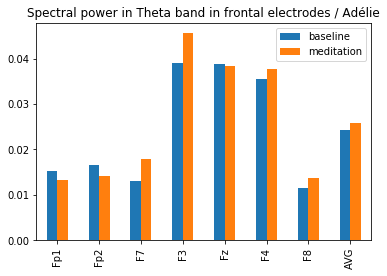

In [17]:
concat_adelie_theta_frontal['AVG'] = concat_adelie_theta_frontal.mean(axis=1)
concat_adelie_theta_frontal.mean(level=0).transpose().plot.bar()
plt.title("Spectral power in Theta band in frontal electrodes / Adélie")

In [89]:
concat_sam_theta_frontal = select_band_for_electrodes(frontal_electrodes, band="theta", subject="sam")

# ttest over all frontal electrodes
ttest_sam_theta_frontal = concat_sam_theta_frontal.agg(lambda x: ttest_ind(x.xs('baseline', level=0), x.xs('meditation', level=0), equal_var=False, nan_policy='omit'))
ttest_sam_theta_frontal

Fp1    (3.7563024277719315, 0.00042776546976602933)
Fp2     (3.6423650741982434, 0.0005812305856618818)
F7        (-0.5925706521467837, 0.5554955149281868)
F3       (-3.31731003580362, 0.0014344532251980044)
Fz     (-5.503818492043754, 3.2203187798258004e-07)
F4     (-10.809658665255357, 3.746641528434547e-19)
F8       (2.8950879035344177, 0.005464220980293568)
dtype: object

In [128]:
# FWER corrected ttest: ttest over 7 frontal electrodes
FWER_threshold = 0.05 / 7
print("The FWER threshold is", FWER_threshold)

p_values_sam_theta_frontal = ttest_sam_theta_frontal.map(lambda x: x[1])
print("The pvalues are \n", p_values_sam_theta_frontal)

# download to CSV only significant pvalues
p_values_sam_theta_frontal[p_values_sam_theta_frontal < FWER_threshold].to_csv('p_values_sam_theta_frontal.csv')
print("The significant pvalues are \n", p_values_sam_theta_frontal[p_values_sam_theta_frontal < FWER_threshold])

The FWER threshold is 0.0071428571428571435
The pvalues are 
 Fp1    4.277655e-04
Fp2    5.812306e-04
F7     5.554955e-01
F3     1.434453e-03
Fz     3.220319e-07
F4     3.746642e-19
F8     5.464221e-03
dtype: float64
The significant pvalues are 
 Fp1    4.277655e-04
Fp2    5.812306e-04
F3     1.434453e-03
Fz     3.220319e-07
F4     3.746642e-19
F8     5.464221e-03
dtype: float64


C:\Users\adeli\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  if __name__ == '__main__':


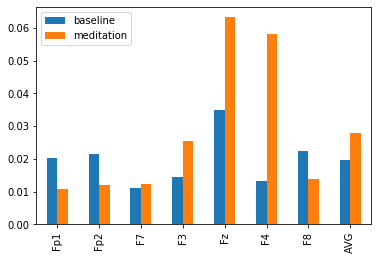

In [107]:
concat_sam_theta_frontal['AVG'] = concat_sam_theta_frontal.mean(axis=1)
concat_sam_theta_frontal.mean(level=0).transpose().plot.bar()
plt.title("Spectral power in Theta band in frontal electrodes / Sam")

### Pariéto-occipital Gamma, should increase

In [ ]:
concat_adelie_gamma_parieto_occipital = select_band_for_electrodes(parieto_occipital_electrodes, band="gamma", subject="adelie")

# ttest
from scipy.stats import ttest_ind

# ttest over all parieto-occipital electrodes
ttest_adelie_gamma_parieto_occipital = concat_adelie_gamma_parieto_occipital.agg(lambda x: ttest_ind(x.xs('baseline', level=0), x.xs('meditation', level=0), equal_var=False, nan_policy='omit'))

In [124]:
# FWER corrected ttest: ttest over 5 parieto-occipital electrodes
FWER_threshold = 0.05 / 5
print("The FWER threshold is", FWER_threshold)
p_values_adelie_gamma_parieto_occipital = ttest_adelie_gamma_parieto_occipital.map(lambda x: x[1])
print("The pvalues are \n", p_values_adelie_gamma_parieto_occipital)

# download to CSV only significant pvalues
p_values_adelie_gamma_parieto_occipital[p_values_adelie_gamma_parieto_occipital < FWER_threshold].to_csv('p_values_adelie_gamma_parieto_occipital.csv')
print("The significant pvalues are \n", p_values_adelie_gamma_parieto_occipital[p_values_adelie_gamma_parieto_occipital < FWER_threshold])

The FWER threshold is 0.01
The pvalues are 
 O1    0.054056
O2    0.000485
P3    0.039605
Pz    0.719012
P4    0.152218
dtype: float64
The significant pvalues are 
 O2    0.000485
dtype: float64


C:\Users\adeli\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  


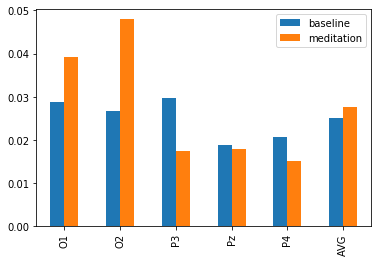

In [118]:
concat_adelie_gamma_parieto_occipital['AVG'] = concat_adelie_gamma_parieto_occipital.mean(axis=1)
concat_adelie_gamma_parieto_occipital.mean(level=0).transpose().plot.bar()
plt.title("Spectral power in Gamma band in parietooccipital electrodes / Adélie")

In [125]:
concat_sam_gamma_parieto_occipital = select_band_for_electrodes(parieto_occipital_electrodes, band="gamma", subject="sam")

# ttest
from scipy.stats import ttest_ind

# ttest over all parieto-occipital electrodes
ttest_sam_gamma_parieto_occipital = concat_sam_gamma_parieto_occipital.agg(lambda x: ttest_ind(x.xs('baseline', level=0), x.xs('meditation', level=0), equal_var=False, nan_policy='omit'))
ttest_sam_gamma_parieto_occipital

O1       (0.13106379559201073, 0.8963143810302566)
O2    (-4.663318985340179, 1.1369476866117593e-05)
P3       (-0.5967960311227196, 0.5539472924807032)
Pz        (1.8955514957374788, 0.0647559534149131)
P4      (-0.10358707140562243, 0.9180259455155778)
dtype: object

In [126]:
# FWER corrected ttest: ttest over 5 parieto-occipital electrodes
FWER_threshold = 0.05 / 5
print("The FWER threshold is", FWER_threshold)

p_values_sam_gamma_parieto_occipital = ttest_sam_gamma_parieto_occipital.map(lambda x: x[1])
print("The pvalues are \n", p_values_sam_gamma_parieto_occipital)

# download to CSV only significant pvalues
p_values_sam_gamma_parieto_occipital[p_values_sam_gamma_parieto_occipital < FWER_threshold].to_csv('p_values_sam_gamma_parieto_occipital.csv')
print("The significant pvalues are \n", p_values_sam_gamma_parieto_occipital[p_values_sam_gamma_parieto_occipital < FWER_threshold])

The FWER threshold is 0.01
The pvalues are 
 O1    0.896314
O2    0.000011
P3    0.553947
Pz    0.064756
P4    0.918026
dtype: float64
The significant pvalues are 
 O2    0.000011
dtype: float64


C:\Users\adeli\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  if __name__ == '__main__':


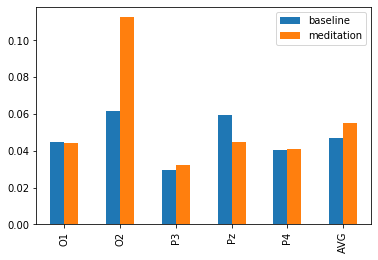

In [127]:
concat_sam_gamma_parieto_occipital['AVG'] = concat_sam_gamma_parieto_occipital.mean(axis=1)
concat_sam_gamma_parieto_occipital.mean(level=0).transpose().plot.bar()
plt.title("Spectral power in Gamma band in parietooccipital electrodes / Sam")

### Frontal Delta, should decrease

In [14]:
concat_adelie_delta_frontal = select_band_for_electrodes(frontal_electrodes, band="delta", subject="adelie")

# ttest
from scipy.stats import ttest_ind

# ttest over all frontal electrodes
ttest_adelie_delta_frontal = concat_adelie_delta_frontal.agg(lambda x: ttest_ind(x.xs('baseline', level=0), x.xs('meditation', level=0), equal_var=False, nan_policy='omit'))
ttest_adelie_delta_frontal

Fp1     (0.44991017676874423, 0.6552221525782596)
Fp2     (0.24987033825940977, 0.8041138990619763)
F7       (-1.775032648312552, 0.0800518486390491)
F3      (-0.9422749318541406, 0.3516437020947507)
Fz      (0.21080928604361468, 0.8342924264605935)
F4     (-0.09646067706200968, 0.9237375210816438)
F8       (0.9155433780248282, 0.3667094896979448)
dtype: object

In [15]:
# FWER corrected ttest: ttest over 7 frontal electrodes
FWER_threshold = 0.05 / 7
print("The FWER threshold is", FWER_threshold)

p_values_adelie_delta_frontal = ttest_adelie_delta_frontal.map(lambda x: x[1])
print("The pvalues are \n", p_values_adelie_delta_frontal)

# download to CSV only significant pvalues
p_values_adelie_delta_frontal[p_values_adelie_delta_frontal < FWER_threshold].to_csv('p_values_adelie_delta_frontal.csv')
print("The significant pvalues are \n", p_values_adelie_delta_frontal[p_values_adelie_delta_frontal < FWER_threshold])

The FWER threshold is 0.0071428571428571435
The pvalues are 
 Fp1    0.655222
Fp2    0.804114
F7     0.080052
F3     0.351644
Fz     0.834292
F4     0.923738
F8     0.366709
dtype: float64
The significant pvalues are 
 Series([], dtype: float64)


C:\Users\adeli\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  if __name__ == '__main__':


Text(0.5, 1.0, 'Spectral power in Delta band in frontal electrodes / Adélie')

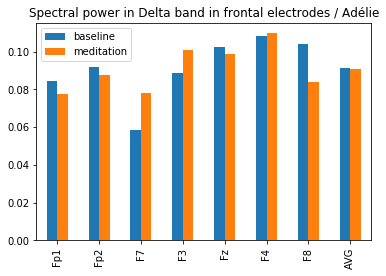

In [16]:
concat_adelie_delta_frontal['AVG'] = concat_adelie_delta_frontal.mean(axis=1)
concat_adelie_delta_frontal.mean(level=0).transpose().plot.bar()
plt.title("Spectral power in Delta band in frontal electrodes / Adélie")

In [133]:
concat_sam_delta_frontal = select_band_for_electrodes(frontal_electrodes, band="delta", subject="sam")

# ttest
from scipy.stats import ttest_ind

# ttest over all frontal electrodes
ttest_sam_delta_frontal = concat_sam_delta_frontal.agg(lambda x: ttest_ind(x.xs('baseline', level=0), x.xs('meditation', level=0), equal_var=False, nan_policy='omit'))
ttest_sam_delta_frontal

Fp1     (5.887413261222209, 7.682448588575151e-07)
Fp2    (5.406113601697242, 2.7241990744089597e-06)
F7      (2.3816036278893695, 0.022464621088986177)
F3     (-2.5701474178030255, 0.012051866747709245)
Fz       (0.09131945304451373, 0.9276771135557291)
F4      (-2.548530432201207, 0.014675725418107265)
F8     (4.941006921345698, 1.0853090585075752e-05)
dtype: object

In [134]:
# FWER corrected ttest: ttest over 7 frontal electrodes
FWER_threshold = 0.05 / 7
print("The FWER threshold is", FWER_threshold)

p_values_sam_delta_frontal = ttest_sam_delta_frontal.map(lambda x: x[1])
print("The pvalues are \n", p_values_sam_delta_frontal)

# download to CSV only significant pvalues
p_values_sam_delta_frontal[p_values_sam_delta_frontal < FWER_threshold].to_csv('p_values_sam_delta_frontal.csv')
print("The significant pvalues are \n", p_values_sam_delta_frontal[p_values_sam_delta_frontal < FWER_threshold])

The FWER threshold is 0.0071428571428571435
The pvalues are 
 Fp1    7.682449e-07
Fp2    2.724199e-06
F7     2.246462e-02
F3     1.205187e-02
Fz     9.276771e-01
F4     1.467573e-02
F8     1.085309e-05
dtype: float64
The significant pvalues are 
 Fp1    7.682449e-07
Fp2    2.724199e-06
F8     1.085309e-05
dtype: float64


C:\Users\adeli\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  if __name__ == '__main__':


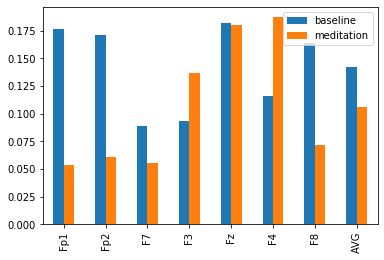

In [135]:
concat_sam_delta_frontal['AVG'] = concat_sam_delta_frontal.mean(axis=1)
concat_sam_delta_frontal.mean(level=0).transpose().plot.bar()
plt.title("Spectral power in Delta band in frontal electrodes / Sam")

### Ratio alpha/theta over all electrodes

In [25]:
concat_adelie_at_all = select_band_for_electrodes(all_electrodes, band="alpha / theta", subject="adelie")

# ttest over all electrodes
ttest_adelie_at_all = concat_adelie_at_all.agg(lambda x: ttest_ind(x.xs('baseline', level=0), x.xs('meditation', level=0), equal_var=False, nan_policy='omit'))
ttest_adelie_at_all

Fp1      (-1.5494834730063847, 0.12980933158412408)
Fp2       (-1.541534465743383, 0.13173939399761914)
F7        (-1.470216746820288, 0.15090628033141817)
F3        (-1.043526524223963, 0.30364033564600795)
Fz       (-0.44387513297903286, 0.6599358869807774)
F4     (-4.071484697907099, 0.00011171422181933442)
F8      (-1.9311635501339781, 0.061140921871802464)
O1        (0.05632139974575411, 0.9553456576110884)
O2        (-0.5428856922362678, 0.5891174085832891)
P3         (-0.497538012950214, 0.6215885729520099)
Pz        (-0.8177332615322513, 0.4184950185913675)
P4        (0.18173203695939943, 0.8568960098860074)
T3       (-1.3192421085000645, 0.19440813056374182)
T4         (0.761392984436531, 0.45133023044689313)
T5        (-1.0076880779333477, 0.3180022297468398)
T6         (0.1038826438018337, 0.9177502324807657)
C3        (-0.8335102944754256, 0.4098191390821595)
Cz         (-1.083565510636892, 0.2850197896191686)
C4        (-0.6044356316059217, 0.5491133397289483)
dtype: objec

In [29]:
# FWER corrected ttest: ttest all electrodes
FWER_threshold = 0.05
print("The FWER threshold is", FWER_threshold)
p_values_adelie_at_all = ttest_adelie_at_all.map(lambda x: x[1])

# download to CSV only significant pvalues
p_values_adelie_at_all[p_values_adelie_at_all < FWER_threshold].to_csv('p_values_adelie_at_all.csv')
print("The significant pvalues are \n", p_values_adelie_at_all[p_values_adelie_at_all < FWER_threshold])

The FWER threshold is 0.05
The significant pvalues are 
 F4    0.000112
dtype: float64


C:\Users\adeli\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  import sys


Text(0.5, 1.0, 'Spectral power in Alpha / Theta in all electrodes / Adélie')

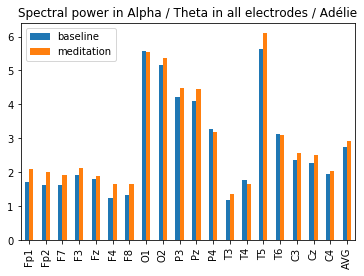

In [32]:
concat_adelie_at_all['AVG'] = concat_adelie_at_all.mean(axis=1)
concat_adelie_at_all.mean(level=0).transpose().plot.bar()
plt.title("Spectral power in Alpha / Theta in all electrodes / Adélie")

In [19]:
concat_sam_at_all = select_band_for_electrodes(all_electrodes, band="alpha / theta", subject="sam")

# ttest over all electrodes
ttest_sam_at_all = concat_sam_at_all.agg(lambda x: ttest_ind(x.xs('baseline', level=0), x.xs('meditation', level=0), equal_var=False, nan_policy='omit'))
ttest_sam_at_all

Fp1      (0.3867160405846775, 0.7007876367581767)
Fp2      (0.2775810051788939, 0.7825828959821445)
F7      (0.42797532799844934, 0.6707283229917422)
F3      (2.4752295222803498, 0.01743131332261332)
Fz     (2.0116785331388534, 0.050621187884427495)
F4       (1.0439513028324785, 0.3024502413018268)
F8       (0.6995647482479886, 0.4877298538104381)
O1      (1.5257122093034008, 0.13321496147413883)
O2       (0.6893488471952562, 0.4934524443921935)
P3      (2.358599285555543, 0.023136777928763674)
Pz       (1.6970106334238766, 0.0976649061883902)
P4      (1.5142598121348394, 0.13716320506971022)
T3      (1.6337052354225219, 0.10851404947442941)
T4      (1.2935636116591294, 0.20139090922452862)
T5      (2.867724321890964, 0.006393586686001241)
T6       (0.7105204585877816, 0.4810718817279842)
C3     (2.2637874996485174, 0.028419590598199127)
Cz      (2.123472487898466, 0.039312456056839265)
C4        (2.124245618683041, 0.0391740767499815)
dtype: object

In [26]:
# FWER corrected ttest: ttest all electrodes
FWER_threshold = 0.05 
print("The FWER threshold is", FWER_threshold)
p_values_sam_at_all = ttest_sam_at_all.map(lambda x: x[1])

# download to CSV only significant pvalues
p_values_sam_at_all[p_values_sam_at_all < FWER_threshold].to_csv('p_values_sam_at_all.csv')
print("The significant pvalues are \n", p_values_sam_at_all[p_values_sam_at_all < FWER_threshold])

The FWER threshold is 0.05
The significant pvalues are 
 F3    0.017431
P3    0.023137
T5    0.006394
C3    0.028420
Cz    0.039312
C4    0.039174
dtype: float64


C:\Users\adeli\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  import sys


Text(0.5, 1.0, 'Spectral power in Alpha / Theta in all electrodes / Sam')

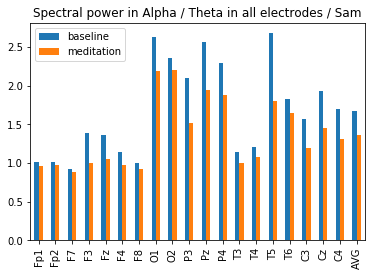

In [31]:
concat_sam_at_all['AVG'] = concat_sam_at_all.mean(axis=1)
concat_sam_at_all.mean(level=0).transpose().plot.bar()
plt.title("Spectral power in Alpha / Theta in all electrodes / Sam")